In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
cd drive/My Drive

/content/drive/My Drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import re 

In [ ]:
unstructured = pd.read_csv('unstructured.csv',encoding='latin1')

In [ ]:
structured = pd.read_csv('structured.csv')

In [ ]:
unstructured.head()

facility_name  ... Rights
0     WINDSOR HEALTH AND REHABILITATION CENTER, LLC  ...  0.005
1  CRESTFIELD REHABILITATION CENTER & FENWOOD MANOR  ...  0.035
2          MONTOWESE HEALTH & REHABILITATION CENTER  ...  0.045
3                  CHESTERFIELDS HEALTH CARE CENTER  ...  0.095
4                                  GLEN HILL CENTER  ...  0.000

[5 rows x 38 columns]

In [ ]:
len(unstructured)

13678

In [ ]:
structured.head()

Federal Provider Number  avg_weekly_covid19_death_per_occupied_bed_pct
0                   15009                                       0.001418
1                   15010                                       0.000000
2                   15012                                       0.000000
3                   15014                                       0.000000
4                   15015                                       0.000000

In [ ]:
len(structured)

13658

In [ ]:
df = pd.merge(unstructured, structured, how='inner',  left_on='facility_id', right_on='Federal Provider Number')

In [ ]:
df.shape

(10608, 40)

In [ ]:
df = df[['facility_id','city','state','zip','complaint','standard','total',
         'total_YN','total_severity','Administration','Environmental','AbuseNeglect',
         'NursingDietary','Nutrition','Pharmacy','QualityLife','CarePlanning','Rights',
         'avg_weekly_covid19_death_per_occupied_bed_pct']]

In [ ]:
df

facility_id  ... avg_weekly_covid19_death_per_occupied_bed_pct
0          205003  ...                                           0.0
1          205004  ...                                           0.0
2          205006  ...                                           0.0
3          205011  ...                                           0.0
4          205012  ...                                           0.0
...           ...  ...                                           ...
10603      555885  ...                                           0.0
10604      555887  ...                                           0.0
10605      555889  ...                                           0.0
10606      555890  ...                                           0.0
10607      555892  ...                                           0.0

[10608 rows x 19 columns]

In [ ]:
#descriptive statistics summary
df['avg_weekly_covid19_death_per_occupied_bed_pct'] =df['avg_weekly_covid19_death_per_occupied_bed_pct'] * 100
df['avg_weekly_covid19_death_per_occupied_bed_pct'].describe()

count    10608.000000
mean         0.264951
std          0.636540
min          0.000000
25%          0.000000
50%          0.000000
75%          0.258622
max         18.813987
Name: avg_weekly_covid19_death_per_occupied_bed_pct, dtype: float64

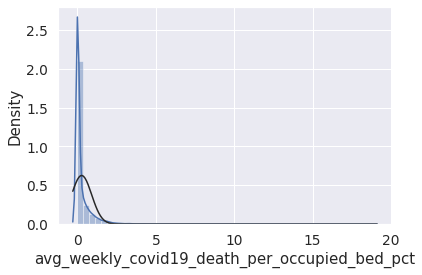

In [ ]:
sns.distplot(df['avg_weekly_covid19_death_per_occupied_bed_pct'], fit=norm);

In [ ]:
df[df['avg_weekly_covid19_death_per_occupied_bed_pct'] >18]

facility_id  ... avg_weekly_covid19_death_per_occupied_bed_pct
5489      155389  ...                                     18.813987

[1 rows x 19 columns]

In [ ]:
unstructured[unstructured['facility_id']=='155389']

facility_name facility_id  ... CarePlanning Rights
6256  WESTPARK A WATERS COMMUNITY      155389  ...        0.032  0.059

[1 rows x 38 columns]

In [ ]:
df_high_risk = df[df['avg_weekly_covid19_death_per_occupied_bed_pct'] >1.0]

In [ ]:
len(df_high_risk)/len(df)

0.3908371040723982

In [ ]:
len(df_high_risk)

4146

In [ ]:
lists = [0,0.5,1.0,1.5,2.0,2.5,3,3.5,4.0]
tot = len(df)
percent = {}
last = len(df)
for num in lists:
  d = df[df['avg_weekly_covid19_death_per_occupied_bed_pct'] >num]
  percent[num] = len(d)/tot

percent


{0: 0.3908371040723982,
 0.5: 0.16987179487179488,
 1.0: 0.08173076923076923,
 1.5: 0.0402526395173454,
 2.0: 0.02102187028657617,
 2.5: 0.012160633484162896,
 3: 0.007824283559577677,
 3.5: 0.005184766214177979,
 4.0: 0.00386500754147813}

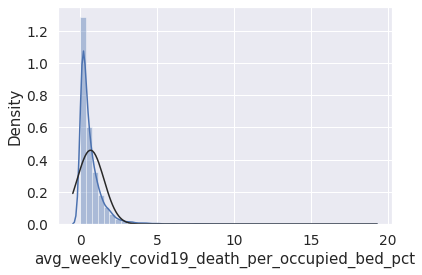

In [ ]:
sns.distplot(df_high_risk['avg_weekly_covid19_death_per_occupied_bed_pct'], fit=norm)

Relationship with numerical variables

In [ ]:
from matplotlib.axes._axes import _log as matplotlib_axes_logger
import numpy
matplotlib_axes_logger.setLevel('ERROR')
var = 'total_YN'
label = 'avg_weekly_covid19_death_per_occupied_bed_pct'
df.plot.scatter(x=var, y=label,c= numpy.atleast_2d(Color))

NameError: ignored

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


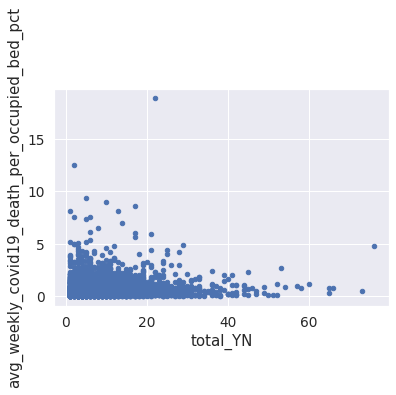

In [ ]:
var = 'total_YN'
label = 'avg_weekly_covid19_death_per_occupied_bed_pct'
df_high_risk.plot.scatter(x=var, y=label)

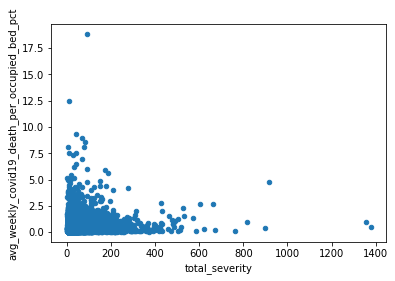

In [ ]:
var = 'total_severity'
label = 'avg_weekly_covid19_death_per_occupied_bed_pct'
df_high_risk.plot.scatter(x=var, y=label)

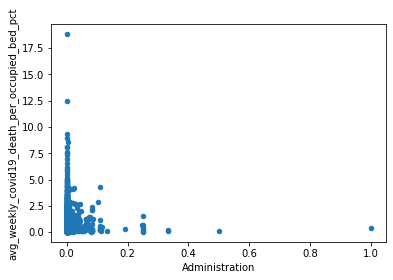

In [ ]:
var = 'Administration'
label = 'avg_weekly_covid19_death_per_occupied_bed_pct'
df_high_risk.plot.scatter(x=var, y=label)

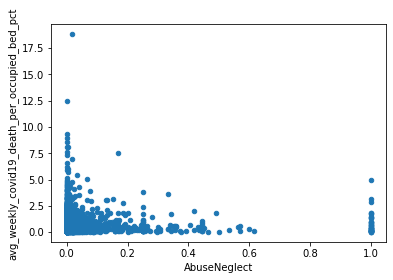

In [ ]:
var = 'AbuseNeglect'
label = 'avg_weekly_covid19_death_per_occupied_bed_pct'
df_high_risk.plot.scatter(x=var, y=label)

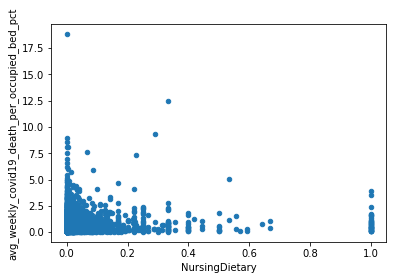

In [ ]:
var = 'NursingDietary'
label = 'avg_weekly_covid19_death_per_occupied_bed_pct'
df_high_risk.plot.scatter(x=var, y=label)

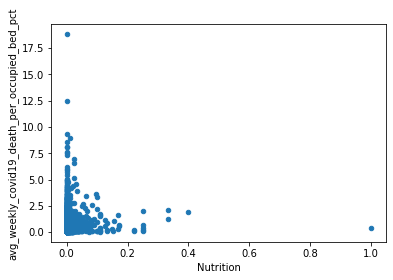

In [ ]:
var = 'Nutrition'
label = 'avg_weekly_covid19_death_per_occupied_bed_pct'
df_high_risk.plot.scatter(x=var, y=label)

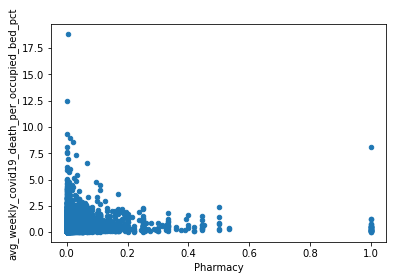

In [ ]:
var = 'Pharmacy'
label = 'avg_weekly_covid19_death_per_occupied_bed_pct'
df_high_risk.plot.scatter(x=var, y=label)

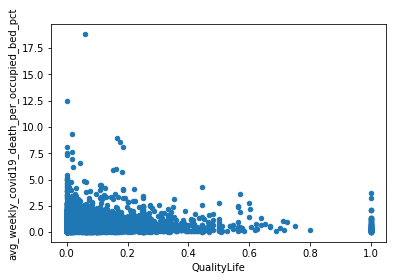

In [ ]:
var = 'QualityLife'
label = 'avg_weekly_covid19_death_per_occupied_bed_pct'
df_high_risk.plot.scatter(x=var, y=label)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


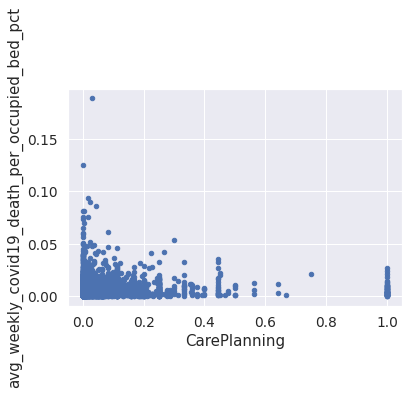

In [ ]:
var = 'CarePlanning'
label = 'avg_weekly_covid19_death_per_occupied_bed_pct'
df_high_risk.plot.scatter(x=var, y=label)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


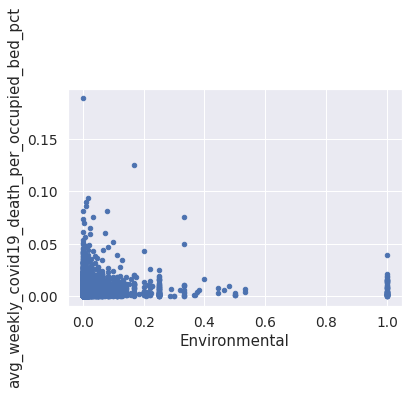

In [ ]:
var = 'Environmental'
label = 'avg_weekly_covid19_death_per_occupied_bed_pct'
df_high_risk.plot.scatter(x=var, y=label)

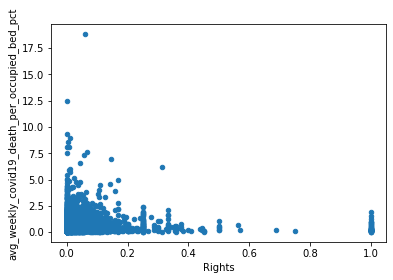

In [ ]:
var = 'Rights'
label = 'avg_weekly_covid19_death_per_occupied_bed_pct'
df_high_risk.plot.scatter(x=var, y=label)

(-0.5, 38.5, 0.0, 20.0)

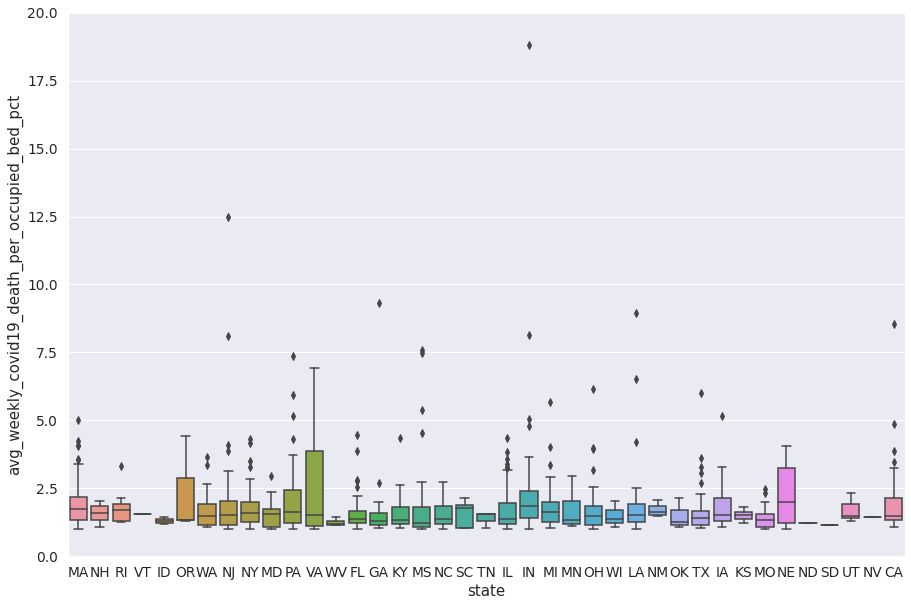

In [ ]:
var = 'state'
label = 'avg_weekly_covid19_death_per_occupied_bed_pct'
f, ax = plt.subplots(figsize=(15, 10))
fig = sns.boxplot(x=var, y=label, data=df_high_risk)
fig.axis(ymin=0, ymax=20)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127]),
 <a list of 128 Text major ticklabel objects>)

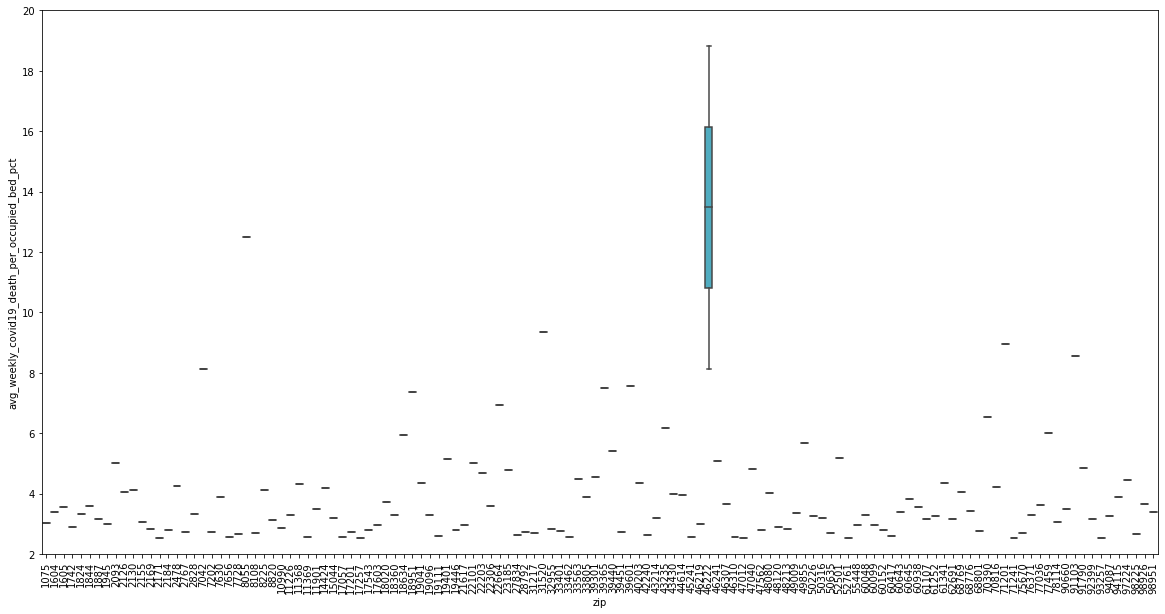

In [ ]:
df_high_risk_25 = df[df['avg_weekly_covid19_death_per_occupied_bed_pct'] >2.5]
var = 'zip'
label = 'avg_weekly_covid19_death_per_occupied_bed_pct'
f, ax = plt.subplots(figsize=(20, 10))
fig = sns.boxplot(x=var, y=label, data=df_high_risk_25)
fig.axis(ymin=2, ymax=20)
plt.xticks(rotation=90)

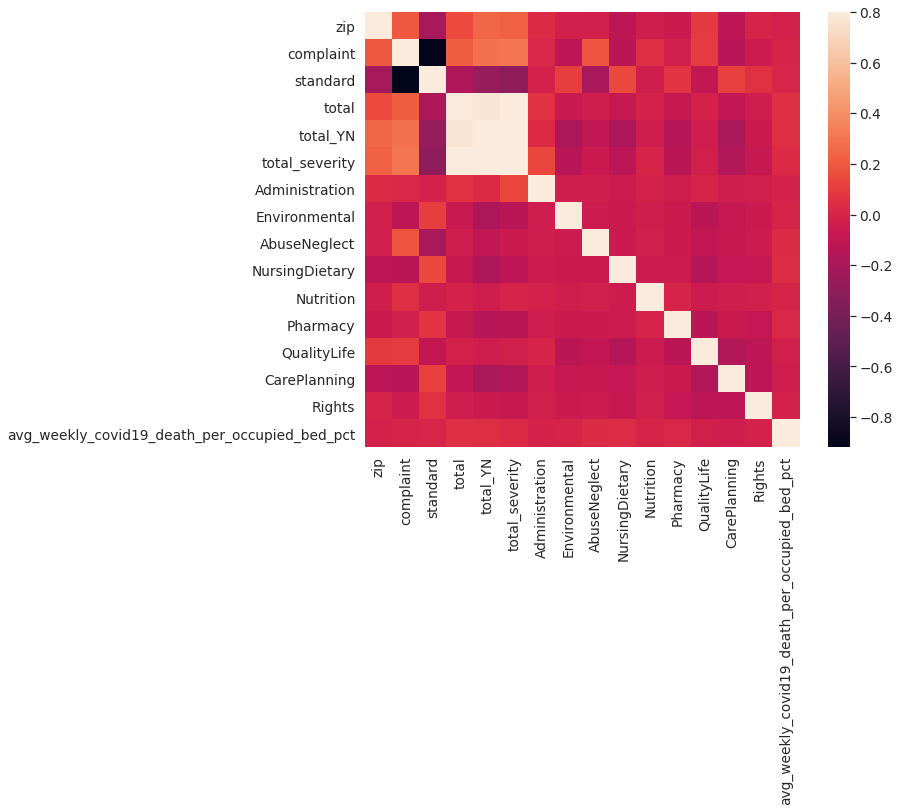

In [ ]:
corrmat = df_high_risk.corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corrmat, vmax=.8, square=True);

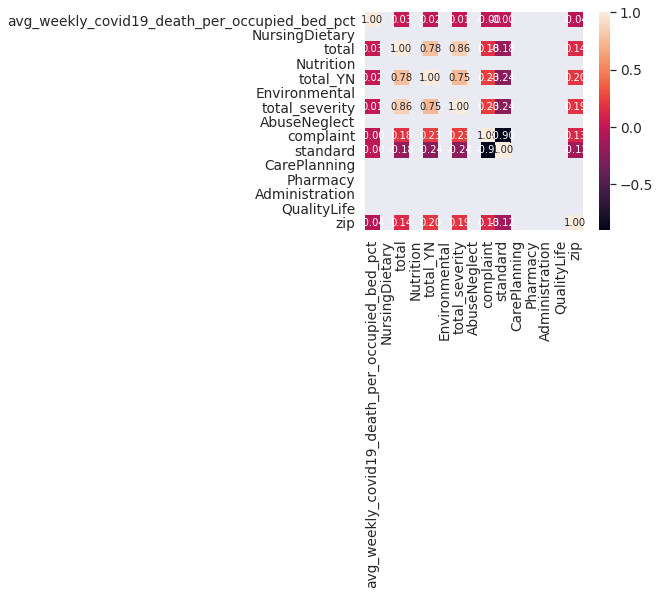

In [ ]:

k = 15 #number of variables for heatmap
cols = corrmat.nlargest(k, 'avg_weekly_covid19_death_per_occupied_bed_pct')['avg_weekly_covid19_death_per_occupied_bed_pct'].index
cm = np.corrcoef(df_high_risk[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split

In [ ]:
df['avg_weekly_covid19_death_per_occupied_bed_pct']  =  df['avg_weekly_covid19_death_per_occupied_bed_pct'].apply(lambda x: 1 if x > 0 else 0)
df['avg_weekly_covid19_death_per_occupied_bed_pct'].describe()

count    10608.000000
mean         0.390837
std          0.487961
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: avg_weekly_covid19_death_per_occupied_bed_pct, dtype: float64

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(df.drop(['avg_weekly_covid19_death_per_occupied_bed_pct'],axis=1), df['avg_weekly_covid19_death_per_occupied_bed_pct'], stratify = df['avg_weekly_covid19_death_per_occupied_bed_pct'], test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, stratify = y_temp, test_size=0.5, random_state=42)
print('Shape of X_train:',X_train.shape)
print('Shape of X_val:',X_val.shape)
print('Shape of X_test:',X_test.shape)

Shape of X_train: (7425, 18)
Shape of X_val: (1591, 18)
Shape of X_test: (1592, 18)


In [ ]:
# Seperation of columns into numeric and categorical columns
types = np.array([dt for dt in X_train.dtypes])
all_columns = X_train.columns.values
is_num = types != 'object'
num_cols = all_columns[is_num]
cat_cols = all_columns[~is_num]

In [ ]:
# Featurization of numeric data
imputer_num = SimpleImputer(strategy='median')
X_train_num = imputer_num.fit_transform(X_train[num_cols])
X_val_num = imputer_num.transform(X_val[num_cols])
X_test_num = imputer_num.transform(X_test[num_cols])

scaler_num = StandardScaler()
X_train_num1 = scaler_num.fit_transform(X_train_num)
X_val_num1 = scaler_num.transform(X_val_num)
X_test_num1 = scaler_num.transform(X_test_num)

X_train_num_final = pd.DataFrame(X_train_num1, columns=num_cols)
X_val_num_final = pd.DataFrame(X_val_num1, columns=num_cols)
X_test_num_final = pd.DataFrame(X_test_num1, columns=num_cols)


In [ ]:
# Featurization of categorical data
imputer_cat = SimpleImputer(strategy='constant', fill_value='MISSING')
X_train_cat = imputer_cat.fit_transform(X_train[cat_cols])
X_val_cat = imputer_cat.transform(X_val[cat_cols])
X_test_cat = imputer_cat.transform(X_test[cat_cols])

X_train_cat1= pd.DataFrame(X_train_cat, columns=cat_cols)
X_val_cat1= pd.DataFrame(X_val_cat, columns=cat_cols)
X_test_cat1= pd.DataFrame(X_test_cat, columns=cat_cols)
ohe = OneHotEncoder(sparse=False,handle_unknown='ignore')

X_train_cat2 = ohe.fit_transform(X_train_cat1)
X_val_cat2 = ohe.transform(X_val_cat1)
X_test_cat2 = ohe.transform(X_test_cat1)
cat_cols_ohe = list(ohe.get_feature_names(input_features=cat_cols))

X_train_cat_final = pd.DataFrame(X_train_cat2, columns = cat_cols_ohe)
X_val_cat_final = pd.DataFrame(X_val_cat2, columns = cat_cols_ohe)
X_test_cat_final = pd.DataFrame(X_test_cat2, columns = cat_cols_ohe)


In [ ]:
# Final complete data
X_train_final = pd.concat([X_train_num_final,X_train_cat_final], axis = 1)
X_val_final = pd.concat([X_val_num_final,X_val_cat_final], axis = 1)
X_test_final = pd.concat([X_test_num_final,X_test_cat_final], axis = 1)
print(X_train_final.shape)
print(X_val_final.shape)
print(X_test_final.shape)

(7425, 10968)
(1591, 10968)
(1592, 10968)


In [ ]:
import lightgbm as lgb

In [ ]:
model_sk = lgb.LGBMClassifier(boosting_type='gbdt', max_depth=7, learning_rate=0.01, n_estimators= 2000, 
                 class_weight='balanced', subsample=0.9, colsample_bytree= 0.8, n_jobs=-1)
train_features, valid_features, train_y, valid_y = train_test_split(X_train_final, y_train, test_size = 0.15, random_state = 42)
model_sk.fit(train_features, train_y, early_stopping_rounds=100, eval_set = [(valid_features, valid_y)], eval_metric = 'auc', verbose = 200)

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.677612	valid_0's auc: 0.713582


LGBMClassifier(boosting_type='gbdt', class_weight='balanced',
               colsample_bytree=0.8, importance_type='split',
               learning_rate=0.01, max_depth=7, min_child_samples=20,
               min_child_weight=0.001, min_split_gain=0.0, n_estimators=2000,
               n_jobs=-1, num_leaves=31, objective=None, random_state=None,
               reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=0.9,
               subsample_for_bin=200000, subsample_freq=0)

In [ ]:
feature_imp = pd.DataFrame(sorted(zip(model_sk.feature_importances_, X_train_final.columns)), columns=['Value','Feature'])
features_df = feature_imp.sort_values(by="Value", ascending=False)
selected_features = list(features_df[features_df['Value']>=0.5]['Feature'])
# Saving the selected features into pickle file

print('The no. of features selected:',len(selected_features))

The no. of features selected: 33


In [ ]:
selected_features

['zip',
 'total_YN',
 'CarePlanning',
 'total',
 'state_IL',
 'state_TX',
 'state_MI',
 'state_LA',
 'Pharmacy',
 'state_WV',
 'state_TN',
 'state_ME',
 'AbuseNeglect',
 'Rights',
 'QualityLife',
 'state_NJ',
 'state_NH',
 'total_severity',
 'state_CA',
 'NursingDietary',
 'state_NC',
 'standard',
 'complaint',
 'Environmental',
 'state_MA',
 'Administration',
 'city_BROOKLYN',
 'city_CHICAGO',
 'state_KS',
 'state_OR',
 'state_MS',
 'state_WI',
 'state_NY']

In [ ]:
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from sklearn.model_selection import train_test_split
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()
import pickle
import gc

In [ ]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

In [ ]:
import IPython

IPython.get_ipython().events.register('pre_run_cell', configure_plotly_browser_state)

In [ ]:

# Feature importance Plot
py.init_notebook_mode(connected=True)
data1 = features_df.head(10)
data = [go.Bar(x =data1.sort_values(by='Value')['Value'] , y = data1.sort_values(by='Value')['Feature'], orientation = 'h',
              marker = dict(
        color = 'rgba(43, 13, 150, 0.6)',
        line = dict(
            color = 'rgba(43, 13, 150, 1.0)',
            width = 1.5)
    )) ]
layout = go.Layout(
    autosize=False,
    width=500,
    height=600,
    title = "Top 10 important features",
    xaxis=dict(
        title='Importance value'
        ),
    yaxis=dict(
        automargin=True
        ),
    bargap=0.4
    )
fig = go.Figure(data = data, layout=layout)
fig.layout.template = 'seaborn'#
py.iplot(fig)


In [ ]:
def plot_confusion_matrix(test_y, predicted_y):
    # Confusion matrix
    C = confusion_matrix(test_y, predicted_y)
    
    # Recall matrix
    A = (((C.T)/(C.sum(axis=1))).T)
    
    # Precision matrix
    B = (C/C.sum(axis=0))
    
    plt.figure(figsize=(20,4))
    
    labels = ['Re-paid(0)','Not Re-paid(1)']
    cmap=sns.light_palette("purple")
    plt.subplot(1,3,1)
    sns.heatmap(C, annot=True, cmap=cmap,fmt="d", xticklabels = labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Orignal Class')
    plt.title('Confusion matrix')
    
    plt.subplot(1,3,2)
    sns.heatmap(A, annot=True, cmap=cmap, xticklabels = labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Orignal Class')
    plt.title('Recall matrix')
    
    plt.subplot(1,3,3)
    sns.heatmap(B, annot=True, cmap=cmap, xticklabels = labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Orignal Class')
    plt.title('Precision matrix')
    
    plt.show()
def cv_plot(alpha, cv_auc):
    
    fig, ax = plt.subplots()
    ax.plot(np.log10(alpha), cv_auc,c='g')
    for i, txt in enumerate(np.round(cv_auc,3)):
        ax.annotate((alpha[i],str(txt)), (np.log10(alpha[i]),cv_auc[i]))
    plt.grid()
    plt.xticks(np.log10(alpha))
    plt.title("Cross Validation Error for each alpha")
    plt.xlabel("Alpha i's")
    plt.ylabel("Error measure")
    plt.show()

##Logistic Regression 
It finds a hyperplane which best seperates the given positive and negative data points.

For alpha 0.0001, cross validation AUC score 0.6971519018844634
For alpha 0.001, cross validation AUC score 0.6994896452403944
For alpha 0.01, cross validation AUC score 0.6263086551256143
For alpha 0.1, cross validation AUC score 0.5
For alpha 1.0, cross validation AUC score 0.5
For alpha 10.0, cross validation AUC score 0.5
For alpha 100.0, cross validation AUC score 0.5
For alpha 1000.0, cross validation AUC score 0.5
For alpha 10000.0, cross validation AUC score 0.5


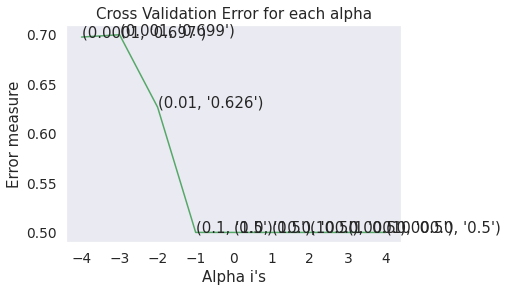

The Optimal C value is: 0.001


In [ ]:

alpha = np.logspace(-4,4,9)
cv_auc_score = []
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1',class_weight = 'balanced', loss='log', random_state=28)
    clf.fit(X_train_final[selected_features], y_train)
    sig_clf = CalibratedClassifierCV(clf, method='sigmoid')
    sig_clf.fit(X_train_final[selected_features], y_train)
    y_pred_prob = sig_clf.predict_proba(X_val_final[selected_features])[:,1]
    cv_auc_score.append(roc_auc_score(y_val,y_pred_prob))
    print('For alpha {0}, cross validation AUC score {1}'.format(i,roc_auc_score(y_val,y_pred_prob)))
cv_plot(alpha, cv_auc_score)
print('The Optimal C value is:', alpha[np.argmax(cv_auc_score)])

For best alpha 0.001, The Train AUC score is 0.6996764602941424
For best alpha 0.001, The Cross validated AUC score is 0.6994896452403944
For best alpha 0.001, The Test AUC score is 0.6856266781582523
The test AUC score is : 0.6856266781582523
The percentage of misclassified points 37.88% :


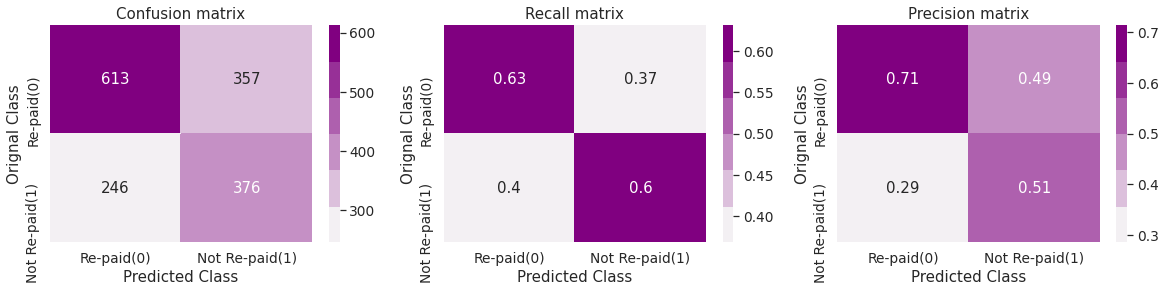

In [ ]:
best_alpha = alpha[np.argmax(cv_auc_score)]
logreg = SGDClassifier(alpha = best_alpha, class_weight = 'balanced', penalty = 'l1', loss='log', random_state = 28)
logreg.fit(X_train_final[selected_features], y_train)
logreg_sig_clf = CalibratedClassifierCV(logreg, method='sigmoid')
logreg_sig_clf.fit(X_train_final[selected_features], y_train)
y_pred_prob = logreg_sig_clf.predict_proba(X_train_final[selected_features])[:,1]
print('For best alpha {0}, The Train AUC score is {1}'.format(best_alpha, roc_auc_score(y_train,y_pred_prob) ))    
y_pred_prob = logreg_sig_clf.predict_proba(X_val_final[selected_features])[:,1]
print('For best alpha {0}, The Cross validated AUC score is {1}'.format(best_alpha, roc_auc_score(y_val,y_pred_prob) ))  
y_pred_prob = logreg_sig_clf.predict_proba(X_test_final[selected_features])[:,1]
print('For best alpha {0}, The Test AUC score is {1}'.format(best_alpha, roc_auc_score(y_test,y_pred_prob) ))
y_pred = logreg.predict(X_test_final[selected_features])
print('The test AUC score is :', roc_auc_score(y_test,y_pred_prob))
print('The percentage of misclassified points {:05.2f}% :'.format((1-accuracy_score(y_test, y_pred))*100))
plot_confusion_matrix(y_test, y_pred)

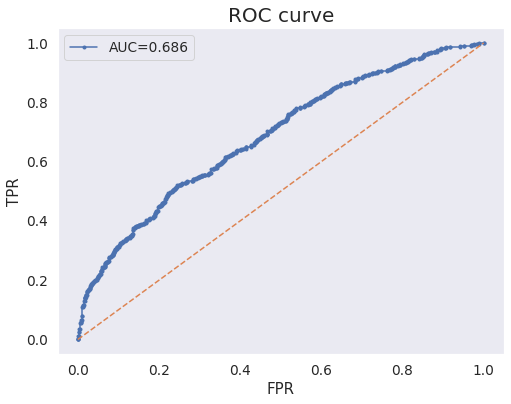

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test,y_pred_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, marker='.')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC curve', fontsize = 20)
plt.xlabel('FPR', fontsize=15)
plt.ylabel('TPR', fontsize=15)
plt.grid()
plt.legend(["AUC=%.3f"%auc])
plt.show()

##Random Forest with selected features:
The Random Forest is a model made up of many decision trees. Rather than just simply averaging the prediction of trees (which we could call a “forest”), this model uses two key concepts that gives it the name random:
Random sampling of training data points when building trees
Random subsets of features considered when splitting nodes

In [ ]:

alpha = [200,500,1000,2000]
max_depth = [7, 10]
cv_auc_score = []
for i in alpha:
    for j in max_depth:
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j,class_weight='balanced',
                                     random_state=42, n_jobs=-1)
        clf.fit(X_train_final[selected_features], y_train)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(X_train_final[selected_features], y_train)
        y_pred_prob = sig_clf.predict_proba(X_val_final[selected_features])[:,1]
        cv_auc_score.append(roc_auc_score(y_val,y_pred_prob))
        print('For n_estimators {0}, max_depth {1} cross validation AUC score {2}'.
              format(i,j,roc_auc_score(y_val,y_pred_prob)))

For n_estimators 200, max_depth 7 cross validation AUC score 0.7086025305366688
For n_estimators 200, max_depth 10 cross validation AUC score 0.7186992922063054
For n_estimators 500, max_depth 7 cross validation AUC score 0.7098344499417638
For n_estimators 500, max_depth 10 cross validation AUC score 0.718881798784838
For n_estimators 1000, max_depth 7 cross validation AUC score 0.709680148925368
For n_estimators 1000, max_depth 10 cross validation AUC score 0.7188403200169898
For n_estimators 2000, max_depth 7 cross validation AUC score 0.7094296171675644
For n_estimators 2000, max_depth 10 cross validation AUC score 0.7188187510577086


The optimal values are: n_estimators 200, max_depth 3 
For best n_estimators 200 best max_depth 3, The Train AUC score is 0.706510662327307
For best n_estimators 200 best max_depth 3, The Validation AUC score is 0.687915409860001
For best n_estimators 200 best max_depth 3, The Test AUC score is 0.677236715616402
The test AUC score is : 0.677236715616402
The percentage of misclassified points 33.10% :


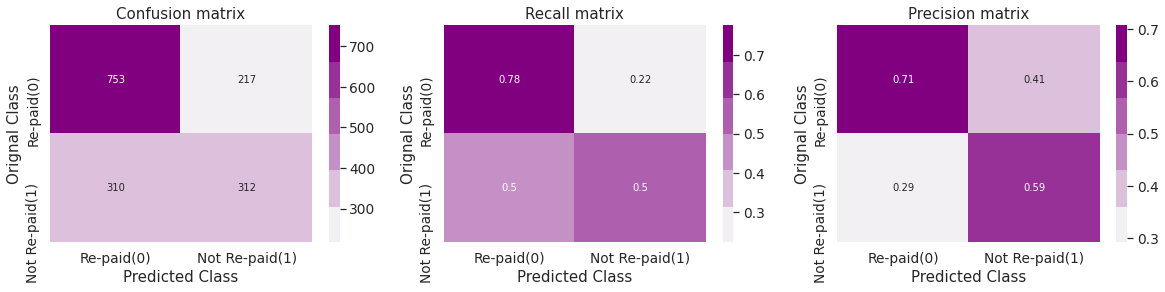

In [ ]:
best_alpha = np.argmax(cv_auc_score)
print('The optimal values are: n_estimators {0}, max_depth {1} '.format(alpha[int(best_alpha/2)],
                                                                        max_depth[int(best_alpha%2)]))
rf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)],
                            class_weight='balanced', random_state=42, n_jobs=-1)
rf.fit(X_train_final[selected_features], y_train)
rf_sig_clf = CalibratedClassifierCV(rf, method="sigmoid")
rf_sig_clf.fit(X_train_final[selected_features], y_train)
y_pred_prob = rf_sig_clf.predict_proba(X_train_final[selected_features])[:,1]
print('For best n_estimators {0} best max_depth {1}, The Train AUC score is {2}'.format(alpha[int(best_alpha/2)], 
                                                    max_depth[int(best_alpha%2)],roc_auc_score(y_train,y_pred_prob)))
y_pred_prob = rf_sig_clf.predict_proba(X_val_final[selected_features])[:,1]
print('For best n_estimators {0} best max_depth {1}, The Validation AUC score is {2}'.format(alpha[int(best_alpha/2)],
                                                            max_depth[int(best_alpha%2)],roc_auc_score(y_val,y_pred_prob)))
y_pred_prob = rf_sig_clf.predict_proba(X_test_final[selected_features])[:,1]
print('For best n_estimators {0} best max_depth {1}, The Test AUC score is {2}'.format(alpha[int(best_alpha/2)],
                                                        max_depth[int(best_alpha%2)],roc_auc_score(y_test,y_pred_prob)))
y_pred = rf_sig_clf.predict(X_test_final[selected_features])
print('The test AUC score is :', roc_auc_score(y_test,y_pred_prob))
print('The percentage of misclassified points {:05.2f}% :'.format((1-accuracy_score(y_test, y_pred))*100))
plot_confusion_matrix(y_test, y_pred)

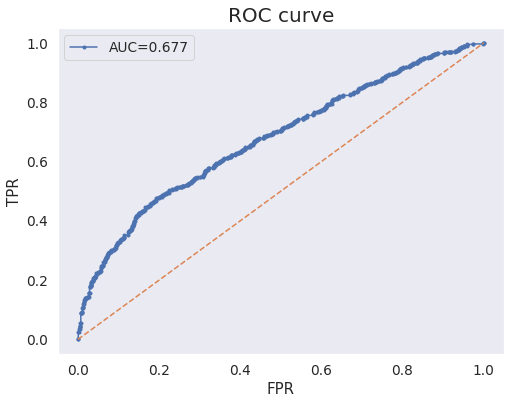

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test,y_pred_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, marker='.')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC curve', fontsize = 20)
plt.xlabel('FPR', fontsize=15)
plt.ylabel('TPR', fontsize=15)
plt.grid()
plt.legend(["AUC=%.3f"%auc])
plt.show()

##LightGBM with selected features

In [ ]:
weight = np.ones((len(X_train_final),), dtype=int)
for i in range(len(X_train_final)):
  if y_train.iloc[i] == 0:
    weight[i]=1
  else:
    weight[i]=11

In [ ]:
train_data=lgb.Dataset(X_train_final[selected_features], label = y_train, weight= weight )
valid_data=lgb.Dataset(X_val_final[selected_features], label = y_val)
cv_auc_score = []
max_depth = [3, 5, 7, 10]
for i in max_depth:
    
    params = {'boosting_type': 'gbdt',
          'max_depth' : i,
          'objective': 'binary',
          'nthread': 5,
          'num_leaves': 32,
          'learning_rate': 0.05,
          'max_bin': 512,
          'subsample_for_bin': 200,
          'subsample': 0.7,
          'subsample_freq': 1,
          'colsample_bytree': 0.8,
          'reg_alpha': 20,
          'reg_lambda': 20,
          'min_split_gain': 0.5,
          'min_child_weight': 1,
          'min_child_samples': 10,
          'scale_pos_weight': 1,
          'num_class' : 1,
          'metric' : 'auc'
          }

NameError: ignored

In [ ]:
lgbm = lgb.train(params,
                 train_data,
                 2500,
                 valid_sets=valid_data,
                 early_stopping_rounds= 100,
                 verbose_eval= 10
                 )
y_pred_prob = lgbm.predict(X_val_final[selected_features])
cv_auc_score.append(roc_auc_score(y_val,y_pred_prob))
print('For  max_depth {0} and some other parameters, cross validation AUC score {1}'.format(i,roc_auc_score(y_val,y_pred_prob)))
print('The optimal  max_depth: ', max_depth[np.argmax(cv_auc_score)])

In [ ]:

params = {'boosting_type': 'gbdt',
          'max_depth' : max_depth[np.argmax(cv_auc_score)],
          'objective': 'binary',
          'nthread': 5,
          'num_leaves': 32,
          'learning_rate': 0.05,
          'max_bin': 512,
          'subsample_for_bin': 200,
          'subsample': 0.7,
          'subsample_freq': 1,
          'colsample_bytree': 0.8,
          'reg_alpha': 20,
          'reg_lambda': 20,
          'min_split_gain': 0.5,
          'min_child_weight': 1,
          'min_child_samples': 10,
          'scale_pos_weight': 1,
          'num_class' : 1,
          'metric' : 'auc'
          }
lgbm = lgb.train(params,
                 train_data,
                 2500,
                 valid_sets=valid_data,
                 early_stopping_rounds= 100,
                 verbose_eval= 10
                 )
y_pred_prob = lgbm.predict(X_train_final[selected_features])
print('For best max_depth {0}, The Train AUC score is {1}'.format(max_depth[np.argmax(cv_auc_score)], 
                                                                  roc_auc_score(y_train,y_pred_prob) ))    
y_pred_prob = lgbm.predict(X_val_final[selected_features])
print('For best max_depth {0}, The Cross validated AUC score is {1}'.format(max_depth[np.argmax(cv_auc_score)], 
                                                                            roc_auc_score(y_val,y_pred_prob) ))  
y_pred_prob = lgbm.predict(X_test_final[selected_features])
print('For best max_depth {0}, The Test AUC score is {1}'.format(max_depth[np.argmax(cv_auc_score)], 
                                                                 roc_auc_score(y_test,y_pred_prob) ))
y_pred = np.ones((len(X_test_final),), dtype=int)
for i in range(len(y_pred_prob)):
    if y_pred_prob[i]<=0.5:
        y_pred[i]=0
    else:
        y_pred[i]=1
print('The test AUC score is :', roc_auc_score(y_test,y_pred_prob))
print('The percentage of misclassified points {:05.2f}% :'.format((1-accuracy_score(y_test, y_pred))*100))
plot_confusion_matrix(y_test, y_pred)

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test,y_pred_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, marker='.')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC curve', fontsize = 20)
plt.xlabel('FPR', fontsize=15)
plt.ylabel('TPR', fontsize=15)
plt.grid()
plt.legend(["AUC=%.3f"%auc])
plt.show()